In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [2]:
from scipy.misc import comb
def rand_index_score(clusters, classes):
    tp_plus_fp = comb(np.bincount(clusters), 2).sum()
    tp_plus_fn = comb(np.bincount(classes), 2).sum()
    A = np.c_[(clusters, classes)]
    tp = sum(comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(clusters))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

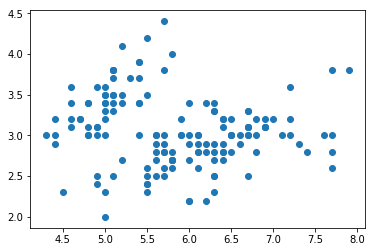

In [3]:
iris = datasets.load_iris()
x = iris.data[:,:2]
y = iris.target

plt.scatter(x[:, 0], x[:, 1], cmap=plt.cm.brg)
plt.show()

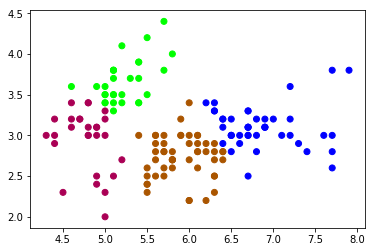

In [4]:
y_true = np.load('groundtruth.npy')
plt.scatter(x[:, 0], x[:, 1], c=y_true, cmap=plt.cm.brg)
plt.show()

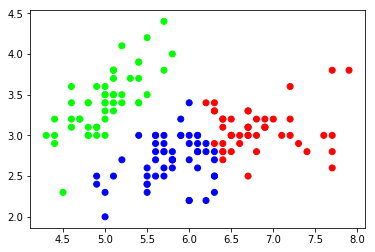

0.8767785234899329


In [5]:
estimator = KMeans(n_clusters=3)
y_pred = estimator.fit_predict(x)

plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()

print(rand_index_score(y_pred,y_true))

In [6]:
y_pred = np.random.choice([0,1,2],size=y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(rand_index_score(y_pred,y_true))

0.5759284116331096


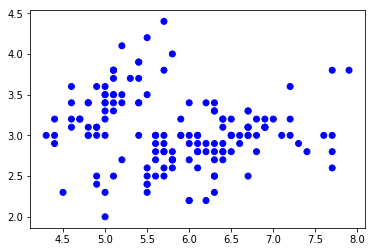

0.2626398210290828


In [7]:
y_pred = np.zeros(y.shape).astype(int)
plt.scatter(x[:, 0], x[:, 1], c=y_pred, cmap=plt.cm.brg)
plt.show()
print(rand_index_score(y_pred,y_true))

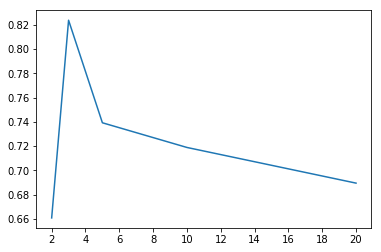

In [8]:
scores = []
k_values = [2,3,5,10,15,20]
for k in k_values:
    estimator = KMeans(n_clusters=k)
    y_pred = estimator.fit_predict(x)
    scores.append(rand_index_score(y,y_pred))
plt.xticks(np.arange(0,22,2))
plt.plot(k_values,scores)
plt.show()